<a href="https://colab.research.google.com/github/learner197/Research-Project/blob/RP-Transfer-Learning/kamal_rp_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import os

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from PIL import Image as im
#import cv2
import plotly.express as px

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
tf

<module 'tensorflow' from '/usr/local/lib/python3.8/dist-packages/tensorflow/__init__.py'>

In [ ]:
image_dir_1 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz')
image_dir_2 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru')
image_dir_3 = Path('/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Filepath_1=[]
Label_1=[]

for file in os.listdir(image_dir_1):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/activity_spectogram_77GHz/{}/{}".format(file,file_name)
        Filepath_1.append(path)
        Label_1.append(file)
        
Filepath_2=[]
Label_2=[]

for file in os.listdir(image_dir_2):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru/{}".format(file)
    for file_name in os.listdir(file_dir):
        path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/spectogram_Xethru/{}/{}".format(file,file_name)
        Filepath_2.append(path)
        Label_2.append(file)
        
Filepath_3=[]
Label_3=[]

for file in os.listdir(image_dir_3):
    file_dir = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz/{}".format(file)
    for file_name in os.listdir(file_dir):
        path = r"/content/drive/MyDrive/RP_DATA/Spectograms_77_24_Xethrue_dataset/Spectrograms_24GHz/{}/{}".format(file,file_name)
        Filepath_3.append(path)
        Label_3.append(file)

In [ ]:
image_df_1 = pd.DataFrame(
    {'Filepath': Filepath_1,
     'Label': Label_1
    })
image_df_1

image_df_2 = pd.DataFrame(
    {'Filepath': Filepath_2,
     'Label': Label_2
    })
image_df_2

image_df_3 = pd.DataFrame(
    {'Filepath': Filepath_3,
     'Label': Label_3
    })

print(image_df_1.shape)
print(image_df_2.shape)
print(image_df_3.shape)

(649, 2)
(735, 2)
(1926, 2)


In [ ]:
image_df_1

,Filepath,Label
0,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
1,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
2,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
3,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
4,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,16_Walking_on_both_toes
...,...,...
644,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
645,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
646,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object
647,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,07_picking_up_an_object


In [ ]:
image_df_2

,Filepath,Label
0,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
1,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
2,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
3,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
4,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,11_crawling
...,...,...
730,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar
731,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar
732,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar
733,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,06_walking_away_from_Radar


In [ ]:
image_df_3

,Filepath,Label
0,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
1,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
2,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
3,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
4,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,17_limping_with_right_leg_stiff
...,...,...
1921,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar
1922,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar
1923,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar
1924,/content/drive/MyDrive/RP_DATA/Spectograms_77_...,05_Walking_towards_radar


Text(0.5, 1.0, 'Frequency of each class in 77GHZ-data')

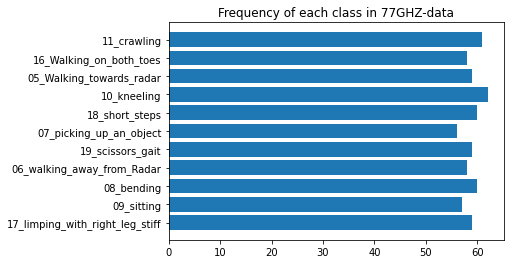

In [ ]:
d=dict()
for i in set(Label_1):
    d[i]=0
for i in Label_1:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(Label_1):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in 77GHZ-data")

Text(0.5, 1.0, 'Frequency of each class in Xethru-data')

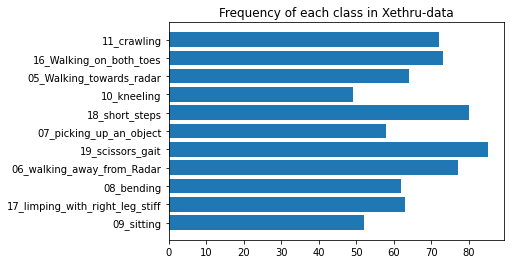

In [ ]:
d=dict()
for i in set(Label_2):
    d[i]=0
for i in Label_2:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(Label_2):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in Xethru-data")

Text(0.5, 1.0, 'Frequency of each class in 24GHZ-data')

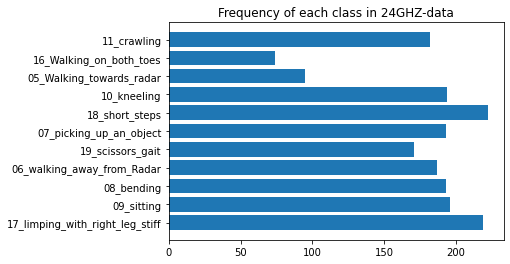

In [ ]:
d=dict()
for i in set(Label_3):
    d[i]=0
for i in Label_3:
    d[i]=d[i]+1
d
y_graph=[]
x_graph=[]
j=0
for i in set(Label_3):
    x_graph.append(i)
    y_graph.append(d[i])
plt.barh(x_graph,y_graph)
plt.title("Frequency of each class in 24GHZ-data")

In [ ]:
plt.bar??

In [ ]:
train_df_1, test_df_1 = train_test_split(image_df_1, train_size=0.7, shuffle=True, random_state=1)
train_df_2, test_df_2 = train_test_split(image_df_2, train_size=0.7, shuffle=True, random_state=1)
train_df_3, test_df_3 = train_test_split(image_df_3, train_size=0.7, shuffle=True, random_state=1)

In [ ]:
train_generator_1 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator_1 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_generator_2 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator_2 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_generator_3 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    validation_split=0.2
)

test_generator_3 = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

In [ ]:
type(train_generator_1)

keras.preprocessing.image.ImageDataGenerator

In [ ]:
train_images_1 = train_generator_1.flow_from_dataframe(
    dataframe=train_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_1 = train_generator_1.flow_from_dataframe(
    dataframe=train_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_1 = test_generator_1.flow_from_dataframe(
    dataframe=test_df_1,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


train_images_2 = train_generator_2.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_2 = train_generator_2.flow_from_dataframe(
    dataframe=train_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_2 = test_generator_2.flow_from_dataframe(
    dataframe=test_df_2,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


train_images_3 = train_generator_3.flow_from_dataframe(
    dataframe=train_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images_3 = train_generator_3.flow_from_dataframe(
    dataframe=train_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images_3 = test_generator_3.flow_from_dataframe(
    dataframe=test_df_3,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 1 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


Found 363 validated image filenames belonging to 11 classes.
Found 90 validated image filenames belonging to 11 classes.
Found 195 validated image filenames belonging to 11 classes.
Found 412 validated image filenames belonging to 11 classes.
Found 102 validated image filenames belonging to 11 classes.
Found 221 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 7 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


Found 1073 validated image filenames belonging to 11 classes.
Found 268 validated image filenames belonging to 11 classes.
Found 574 validated image filenames belonging to 11 classes.


/usr/local/lib/python3.8/dist-packages/keras/preprocessing/image.py:989: UserWarning: Found 4 invalid image filename(s) in x_col="Filepath". These filename(s) will be ignored.
  warnings.warn('Found {} invalid image filename(s) in x_col="{}". '


In [ ]:
type(train_images_1)

keras.preprocessing.image.DataFrameIterator

In [ ]:
test_df_3.shape[0]

578

In [ ]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'77GHZ':[train_df_1.shape[0],test_df_1.shape[0]],
   'Xethru':[train_df_2.shape[0],test_df_2.shape[0]],
   '24GHZ':[train_df_3.shape[0],test_df_3.shape[0]]
}
images_summary = pd.DataFrame(d)
images_summary.index=['training_images','testing_images']
images_summary

,77GHZ,Xethru,24GHZ
training_images,454,514,1348
testing_images,195,221,578


In [ ]:
classes = train_images_1.class_indices
classes

{'05_Walking_towards_radar': 0,
 '06_walking_away_from_Radar': 1,
 '07_picking_up_an_object': 2,
 '08_bending': 3,
 '09_sitting': 4,
 '10_kneeling': 5,
 '11_crawling': 6,
 '16_Walking_on_both_toes': 7,
 '17_limping_with_right_leg_stiff': 8,
 '18_short_steps': 9,
 '19_scissors_gait': 10}

In [ ]:
print(len(train_images_1),train_images_1.image_shape)
print(len(val_images_1),val_images_1.image_shape)
print(len(test_images_1),test_images_1.image_shape)

12 (224, 224, 3)
3 (224, 224, 3)
7 (224, 224, 3)


# loading the base model

In [ ]:
'''from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')'''

"from tensorflow.keras.applications.vgg16 import VGG16\n\nbase_model = VGG16(input_shape = (224, 224, 3), # Shape of our images\ninclude_top = False, # Leave out the last fully connected layer\nweights = 'imagenet')"

In [ ]:
'''# since we don't want vgg16 architecture to be trained on our data instead we want the pre-build vgg16 weights so we make
# training of all layers weights = false
for layer in base_model.layers:
    layer.trainable = False'''

"# since we don't want vgg16 architecture to be trained on our data instead we want the pre-build vgg16 weights so we make\n# training of all layers weights = false\nfor layer in base_model.layers:\n    layer.trainable = False"

In [ ]:
'''x=  layers.MaxPooling2D()(x)

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)


# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='softmax')(x)

model = tf.keras.models.Model(base_model.input, x)

model.summary()
'''

"x=  layers.MaxPooling2D()(x)\n\n# Flatten the output layer to 1 dimension\nx = layers.Flatten()(base_model.output)\n\n\n# Add a fully connected layer with 512 hidden units and ReLU activation\nx = layers.Dense(512, activation='relu')(x)\n\n# Add a dropout rate of 0.5\nx = layers.Dropout(0.5)(x)\n\n# Add a fully connected layer with 512 hidden units and ReLU activation\nx = layers.Dense(512, activation='relu')(x)\n\n# Add a dropout rate of 0.5\nx = layers.Dropout(0.5)(x)\n\n# Add a final sigmoid layer with 1 node for classification output\nx = layers.Dense(1, activation='softmax')(x)\n\nmodel = tf.keras.models.Model(base_model.input, x)\n\nmodel.summary()\n"

In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 5000})'''))

from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

# since we don't want vgg16 architecture to be trained on our data instead we want the pre-build vgg16 weights so we make
# training of all layers weights = false
for layer in base_model.layers:
    layer.trainable = False

x=  layers.GlobalAveragePooling2D()

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)


# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(11, activation='softmax')(x)

model1 = tf.keras.models.Model(base_model.input, x)
model2 = tf.keras.models.Model(base_model.input, x)
model3 = tf.keras.models.Model(base_model.input, x)

model1.summary()


<IPython.core.display.Javascript object>

58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
'''from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')
model = Sequential()

for layer in base_model.layers[:]:
    model.add(layer)

# Freeze the layers
for layer in model.layers:
    layer.trainable = False

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(11, activation='softmax'))

model.summary()'''

"from tensorflow.keras.applications.vgg16 import VGG16\n\nbase_model = VGG16(input_shape = (224, 224, 3), # Shape of our images\ninclude_top = False, # Leave out the last fully connected layer\nweights = 'imagenet')\nmodel = Sequential()\n\nfor layer in base_model.layers[:]:\n    model.add(layer)\n\n# Freeze the layers\nfor layer in model.layers:\n    layer.trainable = False\n\nmodel.add(layers.GlobalAveragePooling2D())\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(512, activation='relu'))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(512, activation='relu'))\nmodel.add(layers.Dropout(0.5))\nmodel.add(layers.Dense(11, activation='softmax'))\n\nmodel.summary()"

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Text(0.5, 1.0, 'Architecture of CNN')

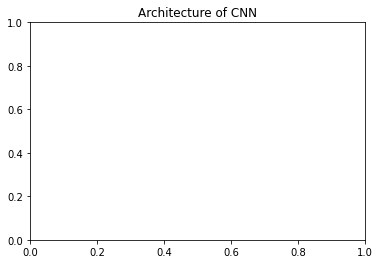

In [ ]:
model1.summary()


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,use_ema=True,ema_momentum=0.9), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
model3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss = 'categorical_crossentropy',metrics = ['acc'])

In [ ]:
## fiting the model using train_images_1 & val_images_1

# New Section

# New Section

In [ ]:
vgg1 = model1.fit(train_images_1, validation_data = val_images_1, epochs = 40)

Epoch 1/40
12/12 [==============================] - 142s 12s/step - loss: 2.6187 - acc: 0.1185 - val_loss: 2.0814 - val_acc: 0.3111
Epoch 2/40
12/12 [==============================] - 12s 1s/step - loss: 2.2245 - acc: 0.2259 - val_loss: 1.8302 - val_acc: 0.4778
Epoch 3/40
12/12 [==============================] - 12s 1s/step - loss: 1.8979 - acc: 0.3664 - val_loss: 1.5989 - val_acc: 0.5444
Epoch 4/40
12/12 [==============================] - 12s 1s/step - loss: 1.5178 - acc: 0.5152 - val_loss: 1.3926 - val_acc: 0.5444
Epoch 5/40
12/12 [==============================] - 12s 1s/step - loss: 1.4362 - acc: 0.4876 - val_loss: 1.3103 - val_acc: 0.5111
Epoch 6/40
12/12 [==============================] - 12s 1s/step - loss: 1.3275 - acc: 0.5069 - val_loss: 1.1787 - val_acc: 0.5667
Epoch 7/40
12/12 [==============================] - 12s 1s/step - loss: 1.1457 - acc: 0.6116 - val_loss: 1.1184 - val_acc: 0.5444
Epoch 8/40
12/12 [==============================] - 13s 1s/step - loss: 1.1912 - acc: 0.

In [ ]:
vgg2 = model2.fit(train_images_2, validation_data = val_images_2, epochs = 40)

Epoch 1/40
13/13 [==============================] - 79s 6s/step - loss: 1.9760 - acc: 0.3277 - val_loss: 1.5044 - val_acc: 0.5784
Epoch 2/40
13/13 [==============================] - 8s 592ms/step - loss: 1.6369 - acc: 0.4199 - val_loss: 1.2541 - val_acc: 0.6176
Epoch 3/40
13/13 [==============================] - 7s 563ms/step - loss: 1.4244 - acc: 0.4757 - val_loss: 1.1280 - val_acc: 0.5980
Epoch 4/40
13/13 [==============================] - 7s 560ms/step - loss: 1.2351 - acc: 0.5534 - val_loss: 1.0553 - val_acc: 0.6863
Epoch 5/40
13/13 [==============================] - 7s 554ms/step - loss: 1.1995 - acc: 0.5655 - val_loss: 0.9903 - val_acc: 0.6765
Epoch 6/40
13/13 [==============================] - 7s 543ms/step - loss: 1.0440 - acc: 0.6311 - val_loss: 0.9736 - val_acc: 0.6569
Epoch 7/40
13/13 [==============================] - 7s 549ms/step - loss: 1.0368 - acc: 0.6238 - val_loss: 0.8862 - val_acc: 0.7353
Epoch 8/40
13/13 [==============================] - 7s 551ms/step - loss: 0.88

In [ ]:
vgg3 = model3.fit(train_images_3, validation_data = val_images_3, epochs = 40)

Epoch 1/40
34/34 [==============================] - 406s 12s/step - loss: 2.1291 - acc: 0.2880 - val_loss: 1.5275 - val_acc: 0.4179
Epoch 2/40
34/34 [==============================] - 7s 190ms/step - loss: 1.5886 - acc: 0.3914 - val_loss: 1.2785 - val_acc: 0.5224
Epoch 3/40
34/34 [==============================] - 7s 191ms/step - loss: 1.3978 - acc: 0.4697 - val_loss: 1.1740 - val_acc: 0.5784
Epoch 4/40
34/34 [==============================] - 7s 192ms/step - loss: 1.2631 - acc: 0.5322 - val_loss: 1.0591 - val_acc: 0.6157
Epoch 5/40
34/34 [==============================] - 7s 194ms/step - loss: 1.1537 - acc: 0.5573 - val_loss: 0.9674 - val_acc: 0.6940
Epoch 6/40
34/34 [==============================] - 7s 195ms/step - loss: 1.0523 - acc: 0.5778 - val_loss: 0.9163 - val_acc: 0.7127
Epoch 7/40
34/34 [==============================] - 7s 196ms/step - loss: 0.9656 - acc: 0.6505 - val_loss: 0.8569 - val_acc: 0.7276
Epoch 8/40
34/34 [==============================] - 7s 197ms/step - loss: 0.

In [ ]:
model2.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model1.evaluate(test_images_1,batch_size=32)

In [ ]:
results_1_1 = model1.evaluate(test_images_1,batch_size=32)
results_1_2 = model1.evaluate(test_images_2,batch_size=32)
results_1_3 = model1.evaluate(test_images_3,batch_size=32)

print("Test Accuracy: {:.2f}%".format(results_1_1[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_1_2[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_1_3[1] * 100))

18/18 [==============================] - 169s 10s/step - loss: 4.1769 - acc: 0.2178
Test Accuracy: 81.03%
Test Accuracy: 10.86%
Test Accuracy: 21.78%


In [ ]:
import numpy
from sklearn import metrics

test_steps_per_epoch = numpy.math.ceil(test_images_3.samples / test_images_3.batch_size)

predictions = model1.predict_generator(test_images_3, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_images_3.classes
class_labels = list(test_images_3.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification_report when Test_images_3 is tested on model-1')
print(report)    

In [ ]:
results_1_1,results_1_2,results_1_3

([0.5356640815734863, 0.8102564215660095],
 [4.187345504760742, 0.1085972860455513],
 [4.176936626434326, 0.2177700400352478])

In [ ]:
results_2_1 = model1.evaluate(test_images_1,batch_size=32)
results_2_2 = model1.evaluate(test_images_2,batch_size=32)
results_2_3 = model1.evaluate(test_images_3,batch_size=32)

print("Test Accuracy: {:.2f}%".format(results_2_1[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_2_2[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_2_3[1] * 100))

18/18 [==============================] - 3s 161ms/step - loss: 3.8547 - acc: 0.2317
Test Accuracy: 57.44%
Test Accuracy: 82.35%
Test Accuracy: 23.17%


In [ ]:
y=model2.predict(test_images_2)
type(y)

7/7 [==============================] - 4s 454ms/step


numpy.ndarray

In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(tf.keras.utils.img_to_array(test_images_1, data_format=None, dtype=None).argmax(axis=1),y.argmax(axis=1))

NameError: ignored

In [ ]:

results_3_1 = model3.evaluate(test_images_1)
results_3_2 = model3.evaluate(test_images_2)
results_3_3 = model3.evaluate(test_images_3)

print("Test Accuracy: {:.2f}%".format(results_3_1[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_3_2[1] * 100))
print("Test Accuracy: {:.2f}%".format(results_3_3[1] * 100))

18/18 [==============================] - 3s 159ms/step - loss: 0.5105 - acc: 0.8258
Test Accuracy: 49.23%
Test Accuracy: 52.49%
Test Accuracy: 82.58%


In [ ]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'77GHZ':[train_df_1.shape[0],test_df_1.shape[0]],
   'Xethru':[train_df_2.shape[0],test_df_2.shape[0]],
   '24GHZ':[train_df_3.shape[0],test_df_3.shape[0]]
}
images_summary = pd.DataFrame(d)
images_summary.index=['77GHZ','Xethru','24GHZ']
images_summary

In [ ]:
col_names=['77GHZ','Xethru','24GHZ']
#col_vals=[],[train_df_2.shape[0],test_df_2.shape[0]],[train_df_3.shape[0],test_df_3.shape[0]]]
d={'Model-1':[results_1_1[1] * 100,results_1_2[1] * 100,results_1_3[1] * 100],
   'Model-2':[results_2_1[1] * 100,results_2_2[1] * 100,results_2_3[1] * 100],
   'Model-3':[results_3_1[1] * 100,results_3_2[1] * 100,results_3_3[1] * 100]
}
images_summary = pd.DataFrame(d)
images_summary.index=['77GHZ','Xethru','24GHZ']
images_summary=images_summary.style.set_caption('Testing Accuracy')
images_summary

,Model-1,Model-2,Model-3
77GHZ,81.025642,57.435900,49.230769
Xethru,10.859729,82.352942,52.488691
24GHZ,21.777004,23.170732,82.578397


In [ ]:
results_3_1

[1.5771629810333252, 0.4923076927661896]

# Code for classification report

In [ ]:
test_steps_per_epoch = numpy.math.ceil(test_images_3.samples / test_images_3.batch_size)

predictions = model3.predict_generator(test_images_3, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_images_3.classes
class_labels = list(test_images_3.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print('Classification_report when Test_images_3 is tested on model-3')
print(report)    

<ipython-input-70-c379038ffa4b>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model3.predict_generator(test_images_3, steps=test_steps_per_epoch)


Classification_report when Test_images_3 is tested on model-3
                                 precision    recall  f1-score   support

       05_Walking_towards_radar       0.96      0.88      0.92        26
     06_walking_away_from_Radar       1.00      1.00      1.00        63
        07_picking_up_an_object       0.72      0.58      0.64        65
                     08_bending       0.76      0.69      0.73        59
                     09_sitting       0.89      0.94      0.92        54
                    10_kneeling       0.71      0.86      0.78        57
                    11_crawling       0.92      0.98      0.95        49
        16_Walking_on_both_toes       0.71      0.71      0.71        21
17_limping_with_right_leg_stiff       0.74      0.83      0.78        63
                 18_short_steps       0.85      0.92      0.88        65
               19_scissors_gait       0.85      0.65      0.74        52

                       accuracy                           0.

# Code for confusion matrix

<ipython-input-72-8cfeef2b34e2>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model3.predict_generator(test_images_3, steps=test_steps_per_epoch)


Text(0.5, 1.0, 'Heatmap when testing_images_3 is tested on model-3')

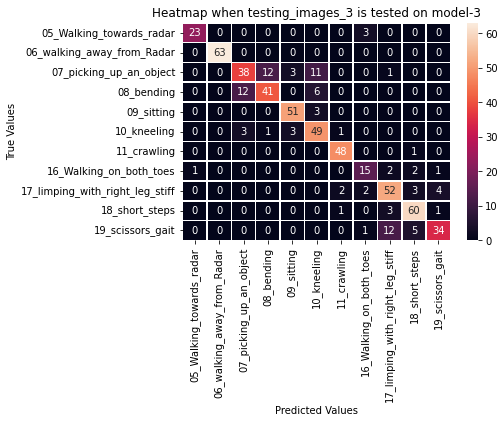

In [ ]:
test_steps_per_epoch = numpy.math.ceil(test_images_3.samples / test_images_3.batch_size)

predictions = model3.predict_generator(test_images_3, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

true_classes = test_images_3.classes
class_labels = list(test_images_3.class_indices.keys())

confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)


sns.heatmap(confusion_matrix,annot=True,linewidth=0.5,xticklabels=classes,yticklabels=classes).set(xlabel="Predicted Values", ylabel="True Values")
plt.title("Heatmap when testing_images_3 is tested on model-3")

Confusion matrix

In [ ]:
#test_images_1
import numpy
from sklearn import metrics

In [ ]:
test_steps_per_epoch = numpy.math.ceil(test_images_1.samples / test_images_1.batch_size)

predictions = model1.predict_generator(test_images_1, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = numpy.argmax(predictions, axis=1)

In [ ]:
true_classes = test_images_1.classes
class_labels = list(test_images_1.class_indices.keys())

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)    

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_true=true_classes, y_pred=predicted_classes)
print(confusion_matrix)

In [ ]:
model.save('/content/drive/MyDrive')

# epochs = 20
history = model.fit(
train_images,
validation_data=val_images,
epochs=epochs)
# batch_size= 13

model1.save('')

# New Section